# SMS Spam 

In [1]:
import pandas as pd
import numpy as np

In [2]:
Spam_dataset=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
Spam_dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# removing null values
# EDA
# Text pre processing
# Model printing
# evaluation 
# improvments
# website

In [5]:
# Data Cleaning

Spam_dataset.shape

(5572, 5)

In [6]:
Spam_dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
Spam_dataset=Spam_dataset[['v1','v2']]

In [8]:
Spam_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
Spam_dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
Spam_dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
Spam_dataset.replace({
    'ham': 0,
    'spam': 1
},inplace=True)

In [12]:
# We have converted catogerical values in to the numerical values

# ie we represent ham:0
#                 spam:1

In [13]:
Spam_dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
Spam_dataset.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

In [15]:
import seaborn as sns

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

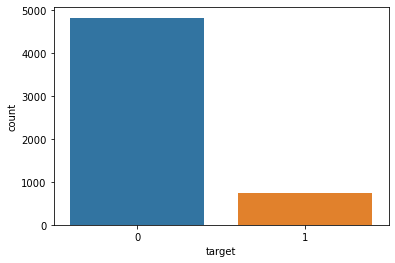

In [16]:
sns.countplot('target',data=Spam_dataset)

As we can see that our data is purely imbalanced

In [17]:
ham = Spam_dataset[Spam_dataset.target==0]
spam = Spam_dataset[Spam_dataset.target==1]

In [18]:
print(ham.shape,spam.shape)

(4825, 2) (747, 2)


In [19]:
ham =ham.sample(n=747)

In [20]:
ham.shape

(747, 2)

In [21]:
# we have adjusted our ham equal to spam 

In [22]:
underSampled=pd.concat([ham,spam],axis=0)

In [23]:
underSampled.shape

(1494, 2)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

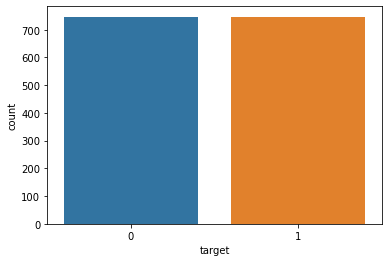

In [24]:
sns.countplot('target',data=underSampled)

In [25]:
underSampled.duplicated().sum()

106

In [26]:
underSampled=underSampled.drop_duplicates(keep='first')

In [27]:
underSampled.duplicated().sum()

0

In [28]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
underSampled['num_characters']=underSampled['text'].apply(len)

In [30]:
underSampled['num_words']=underSampled['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [31]:
underSampled['num_words']

375      5
2721    10
4318     7
2189    19
5439    11
        ..
5537    18
5540    38
5547    35
5566    30
5567    35
Name: num_words, Length: 1388, dtype: int64

In [32]:
underSampled['num_sentence']=underSampled['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [33]:
underSampled['num_sentence']

375     1
2721    1
4318    1
2189    1
5439    1
       ..
5537    3
5540    6
5547    5
5566    1
5567    4
Name: num_sentence, Length: 1388, dtype: int64

In [34]:
underSampled.head()

,target,text,num_characters,num_words,num_sentence
375,0,Can you say what happen,23,5,1
2721,0,I'm working technical support :)voice process.,46,10,1
4318,0,Are you still playing with gautham?,35,7,1
2189,0,Yup i shd haf ard 10 pages if i add figures......,73,19,1
5439,0,Hey i've booked the 2 lessons on sun liao...,44,11,1


In [35]:
underSampled[underSampled['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
underSampled[underSampled['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,735.000000,735.000000,735.000000
mean,68.216327,16.748299,1.798639
std,52.301664,12.609436,1.370275
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,87.000000,22.000000,2.000000
max,588.000000,153.000000,16.000000


As we can see that number of characters ,words and sentences are comparativily high when it comes to span mails

# 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

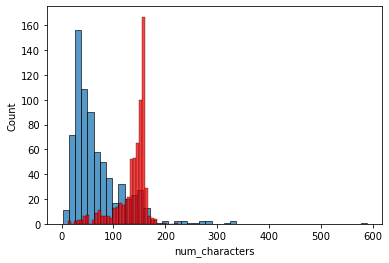

In [37]:
sns.histplot(underSampled[underSampled['target']==0]['num_characters'])
sns.histplot(underSampled[underSampled['target']==1]['num_characters'] ,color='red')

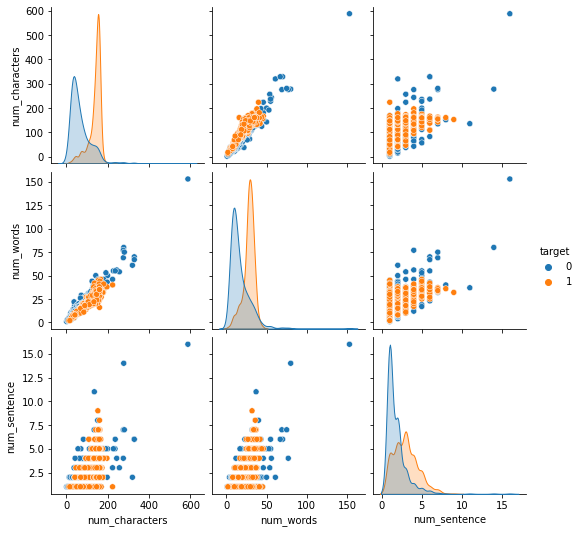

In [38]:
sns.pairplot(underSampled,hue='target')

<AxesSubplot:>

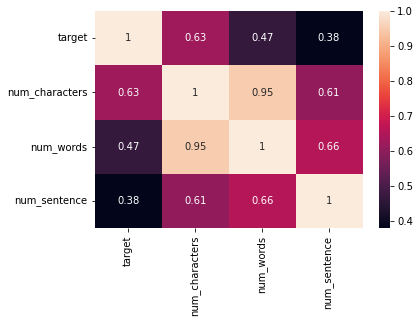

In [39]:
sns.heatmap(underSampled.corr(),annot=True)

We have multi co-linearity so we will take only value from above three

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_characters'>

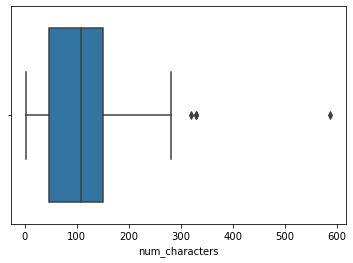

In [40]:
sns.boxplot(underSampled['num_characters'])

In [41]:
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Above are the punctuations that we dont want in our dataset

In [42]:
def tranform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[ : ]
    y.clear()
            
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    text = y[ : ]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [43]:
underSampled['text']=underSampled['text'].apply(lambda x: tranform(x))

In [44]:
underSampled.head()

,target,text,num_characters,num_words,num_sentence
375,0,say happen,23,5,1
2721,0,work technic support voic process,46,10,1
4318,0,still play gautham,35,7,1
2189,0,yup shd haf ard 10 page add figur ìï got mani ...,73,19,1
5439,0,hey book 2 lesson sun liao,44,11,1


In [45]:
from wordcloud import WordCloud


In [46]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_msgs=wc.generate(underSampled[underSampled['target']==1]['text'].str.cat(sep=" "))

In [48]:
import matplotlib.pyplot as plt

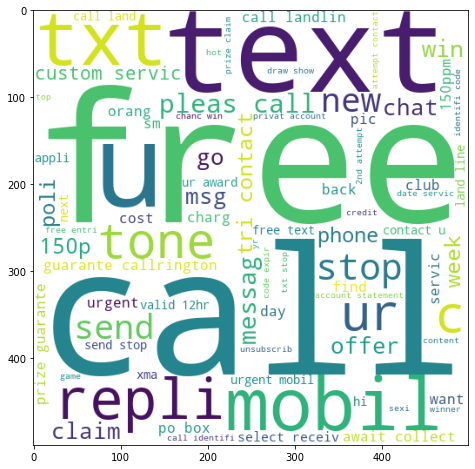

In [49]:
plt.figure(figsize=(20,8))
plt.imshow(spam_msgs)

In [50]:
ham_msgs=wc.generate(underSampled[underSampled['target']==0]['text'].str.cat(sep=" "))

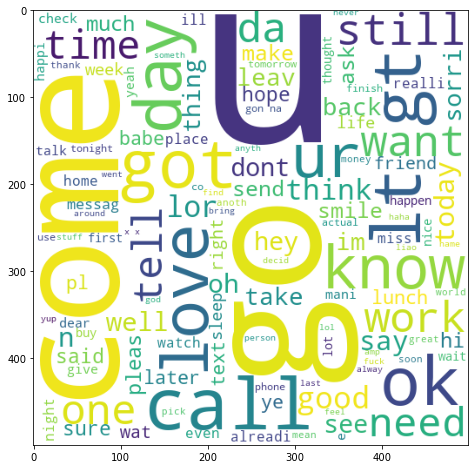

In [51]:
plt.figure(figsize=(20,8))
plt.imshow(ham_msgs)

In [55]:
word_collection=[]

for msg in underSampled[underSampled['target']==1]['text'].tolist():
    for word in msg.split():
        word_collection.append(word)

In [60]:
len(word_collection)

9939

In [67]:
from collections import Counter

pd.DataFrame(Counter(word_collection).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


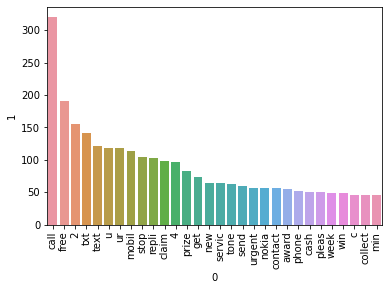

In [70]:
sns.barplot(pd.DataFrame(Counter(word_collection).most_common(30))[0],pd.DataFrame(Counter(word_collection).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()